###Q1
1. Import the necessary libraries
2. Import the dataset
3. Assign it to a variable called users

In [1]:
import pandas as pd

In [5]:
users = pd.read_csv("/Users/Admin/Downloads/users.csv", delimiter="|")
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [6]:
##4. Discover what is the mean age per occupation

group=users.groupby('occupation')
group.age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [7]:
##5. Discover the Male ratio per occupation and sort it from the most to the least

ratio = (users.groupby('occupation').gender.count()).sort_values(ascending = False)
print(ratio)

occupation
student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
lawyer            12
salesman          12
none               9
homemaker          7
doctor             7
Name: gender, dtype: int64


In [9]:
##6. For each occupation, calculate the minimum and maximum ages

u_age=users.groupby('occupation').age
u_age=u_age.agg(['min','max'])
u_age

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [10]:
##7. For each combination of occupation and sex, calculate the mean age

u_combo=users.groupby(['occupation','gender'])
u_combo.age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [114]:
##8. For each occupation present the percentage of women and men

gender = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})
occupation = users.groupby(['occupation']).count()
occupation_gender = gender.div(occupation, level = "occupation")
occupation_gender.loc[:, 'gender']

occupation     gender
administrator  F         0.455696
               M         0.544304
artist         F         0.464286
               M         0.535714
doctor         M         1.000000
educator       F         0.273684
               M         0.726316
engineer       F         0.029851
               M         0.970149
entertainment  F         0.111111
               M         0.888889
executive      F         0.093750
               M         0.906250
healthcare     F         0.687500
               M         0.312500
homemaker      F         0.857143
               M         0.142857
lawyer         F         0.166667
               M         0.833333
librarian      F         0.568627
               M         0.431373
marketing      F         0.384615
               M         0.615385
none           F         0.444444
               M         0.555556
other          F         0.342857
               M         0.657143
programmer     F         0.090909
               M         0

##Q2 
##1. Import the necessary libraries
##2. Import the dataset
##3. Assign it to a variable called euro12

In [11]:
import pandas as pd
euro12 = pd.read_csv("/users/Admin/Downloads/euro.csv", delimiter=",")
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [115]:
##4. Select only the Goal column

euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [116]:
##5. How many team participated in the Euro2012?

euro12['Team'].count()

16

In [14]:
##6. What is the number of columns in the dataset?

print(len(euro12.columns))

35


In [16]:
##7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

dp = euro12[['Team', 'Yellow Cards', 'Red Cards']]
Dscp= pd.DataFrame(dp)
Dscp

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [117]:
##8. Sort the teams by Red Cards, then to Yellow Cards

dp.sort_values(by=['Red Cards','Yellow Cards'])
dp

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [18]:
##9. Calculate the mean Yellow Cards given per Team

dp['Yellow Cards'].mean()

7.4375

In [19]:
##10. Filter teams that scored more than 6 goals

f_team=euro12[euro12['Goals'] >= 6]
f_team

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
10,Portugal,6,22,42,34.3%,9.3%,82,6,0,0,...,10,71.5%,73,90,10,12,0,14,14,16
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [20]:
##11. Select the teams that start with G

f_team=euro12[euro12['Team'].str.startswith('G')]
f_team

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [21]:
##12. Select the first 7 columns

euro12[euro12.columns[:7]]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [22]:
##13. Select all columns except the last 3

euro12[euro12.columns[:-3]]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [23]:
##14. Present only the Shooting Accuracy from England, Italy and Russia

euro12.loc[euro12.Team.isin(['England', 'Italy', 'Russia']), ['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


##Q3 
##1. Import the necessary libraries
##2. Create 3 differents Series, each of length 100, as follows:
##The first a random number from 1 to 4
##The second a random number from 1 to 3
##The third a random number from 10,000 to 30,000
##3. Create a DataFrame by joinning the Series by column

In [27]:
import pandas as pd
import numpy as np
import random

n1 = pd.Series(np.random.randint(1,5,100))
n2 = pd.Series(np.random.randint(1,4,100))
n3 = pd.Series(np.random.randint(10000,30000,100))

s = pd.concat([n1,n2,n3],axis=1)
s.head()

,0,1,2
0,1,1,17890
1,1,1,14334
2,2,1,10628
3,4,2,14624
4,1,1,19487


In [28]:
##4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

s.columns = ['bedrs','bathrs','price_sqr_meter']
s.head()

,bedrs,bathrs,price_sqr_meter
0,1,1,17890
1,1,1,14334
2,2,1,10628
3,4,2,14624
4,1,1,19487


In [30]:
## 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

bigcolumn = pd.concat([n1,n2,n3],axis=0)
bigcolumn

0         1
1         1
2         2
3         4
4         1
5         2
6         2
7         4
8         3
9         4
10        1
11        3
12        3
13        3
14        1
15        2
16        2
17        4
18        3
19        2
20        3
21        3
22        4
23        4
24        2
25        4
26        3
27        1
28        3
29        2
      ...  
70    28210
71    17211
72    24321
73    24792
74    26246
75    15566
76    15955
77    19157
78    29749
79    16947
80    29723
81    24916
82    10827
83    24412
84    29425
85    14630
86    25783
87    23119
88    21073
89    20157
90    26241
91    27073
92    13295
93    23923
94    16367
95    29407
96    13130
97    20537
98    16318
99    28505
Length: 300, dtype: int32

In [32]:
## 6. Ops it seems it is going only until index 99. Is it true?
##Ans: No the index length is 300 as shown above

bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn

0          1
1          1
2          2
3          4
4          1
5          2
6          2
7          4
8          3
9          4
10         1
11         3
12         3
13         3
14         1
15         2
16         2
17         4
18         3
19         2
20         3
21         3
22         4
23         4
24         2
25         4
26         3
27         1
28         3
29         2
       ...  
270    28210
271    17211
272    24321
273    24792
274    26246
275    15566
276    15955
277    19157
278    29749
279    16947
280    29723
281    24916
282    10827
283    24412
284    29425
285    14630
286    25783
287    23119
288    21073
289    20157
290    26241
291    27073
292    13295
293    23923
294    16367
295    29407
296    13130
297    20537
298    16318
299    28505
Length: 300, dtype: int32

###Q4
1. Import the necessary libraries
2. Import the dataset from the attached file wind.txt
3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

In [33]:
import pandas as pd
import datetime

dateTime = pd.read_csv("/users/Admin/Downloads/wind.txt", sep = "\s+", parse_dates = [[0,1,2]]) 
dateTime.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [119]:
##4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it

dateTime["Yr_Mo_Dy"] = dateTime["Yr_Mo_Dy"].apply(lambda x: x.replace(year=x.year - 100) if x.year >2000 else x.replace(year=x.year))
dateTime.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [120]:
##5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
d_index = dateTime.set_index("Yr_Mo_Dy")
d_index.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [41]:
##6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.
dateTime.isnull().sum()

Yr_Mo_Dy    0
RPT         6
VAL         3
ROS         2
KIL         5
SHA         2
BIR         0
DUB         3
CLA         2
MUL         3
CLO         1
BEL         0
MAL         4
dtype: int64

In [42]:
##7. Compute how many non-missing values there are in total

(dateTime.notnull().sum()).sum()

85431

In [121]:
##8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times. A single number for the entire dataset

overall_mean = dateTime.mean()
overall_mean.mean()

10.227982360836924

In [46]:
##9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days

loc_stats = pd.DataFrame(dateTime.describe())
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6568.000000,6571.000000,6572.000000,6569.000000,6572.000000,6574.000000,6571.000000,6572.000000,6571.000000,6573.000000,6574.000000,6570.000000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
25%,8.120000,6.670000,8.000000,3.580000,6.750000,4.000000,6.000000,5.090000,5.370000,5.330000,8.710000,10.710000
50%,11.710000,10.170000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.290000,12.500000,15.000000
75%,15.920000,14.040000,14.670000,8.420000,13.540000,9.670000,12.960000,11.420000,11.190000,11.630000,16.880000,19.830000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


In [49]:
##10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day. A different set of numbers for each day.

day_stats = pd.DataFrame()
day_stats['min'] = dateTime.min(axis = 1) 
day_stats['max'] = dateTime.max(axis = 1) 
day_stats['mean'] = dateTime.mean(axis = 1)
day_stats['std'] = dateTime.std(axis = 1) 

day_stats.head()

,min,max,mean,std
0,9.29,18.50,13.018182,2.808875
1,6.50,17.54,11.336364,3.188994
2,6.17,18.50,11.641818,3.681912
3,1.79,11.75,6.619167,3.198126
4,6.17,13.33,10.630000,2.445356


In [52]:
##11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.

d_index[d_index.index.month == 1].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [53]:
##12. Downsample the record to a yearly frequency for each location.

d_index.resample('Y').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-12-31,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962-12-31,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963-12-31,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964-12-31,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965-12-31,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966-12-31,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967-12-31,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968-12-31,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969-12-31,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [122]:
##13. Downsample the record to a monthly frequency for each location.

d_index.resample('M').mean().head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-31,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02-28,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03-31,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04-30,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05-31,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613


In [123]:
##14. Downsample the record to a weekly frequency for each location.

d_index.resample('W').mean().head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000


In [56]:
##15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

d= d_index.resample('W').mean().apply(pd.DataFrame.describe,axis=1)
d[:53].head(10)

,count,mean,std,min,25%,50%,75%,max
Yr_Mo_Dy,,,,,,,,
1961-01-01,11.0,13.018182,2.808875,9.290000,10.540000,13.170000,15.000000,18.500000
1961-01-08,12.0,9.847659,2.601705,6.417143,7.979881,9.980714,11.735357,13.541429
1961-01-15,12.0,8.353214,2.719649,4.630000,6.543214,7.553571,11.049643,12.468571
1961-01-22,12.0,9.368413,2.224531,6.328571,7.761071,9.111905,10.255714,13.204286
1961-01-29,12.0,16.958095,2.915635,12.720000,15.077143,15.890714,18.639286,22.530000
1961-02-05,12.0,11.800357,2.807310,8.247143,9.371786,12.070000,13.524286,16.827143
1961-02-12,12.0,15.891548,3.147412,10.774286,14.346071,14.892143,17.767143,21.832857
1961-02-19,12.0,13.726825,3.105819,9.542857,12.063571,13.476429,15.101071,21.167143
1961-02-26,12.0,12.604286,2.364323,8.524286,10.755000,13.177857,14.325714,16.304286


##Q5.
1. Import the necessary libraries
2. Import the dataset from this address.
3. Assign it to a variable called chipo.

In [57]:
import pandas as pd
chipo = pd.read_csv("/users/Admin/Downloads/chipo.csv", delimiter= "\t")
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [58]:
##4. See the first 10 entries

chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [59]:
##5. What is the number of observations in the dataset?

chipo.order_id.count()

4622

In [60]:
##6. What is the number of columns in the dataset?

len(chipo.columns)

5

In [61]:
##7. Print the name of all the columns.

chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [62]:
##8. How is the dataset indexed?

chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [63]:
##9. Which was the most-ordered item?

chipo.item_name.mode()

0    Chicken Bowl
dtype: object

In [64]:
##10. For the most-ordered item, how many items were ordered?

countItem=chipo.item_name.value_counts()
countItem[:1]

Chicken Bowl    726
Name: item_name, dtype: int64

In [65]:
##11. What was the most ordered item in the choice_description column?

chipo.choice_description.mode()

0    [Diet Coke]
dtype: object

In [66]:
##12. How many items were orderd in total?

chipo.quantity.sum()

4972

In [127]:
##13. Turn the item price into a float
##Check the item price type
##Create a lambda function and change the type of item price
##Check the item price type

chipo.item_price.dtype

dtype('float64')

In [129]:
##(It shows an type error as i alread changed the data type and tried to run it again)
chipo['item_price'] = chipo.item_price.apply(lambda x : int(x[1:-1])) 
chipo

TypeError: 'float' object is not subscriptable

In [130]:
chipo.item_price.dtype

dtype('float64')

In [70]:
##14. How much was the revenue for the period in the dataset?

chipo.item_price.sum()

34500.16

In [71]:
##15. How many orders were made in the period?

len(chipo.order_id.unique())

1834

In [72]:
##16. What is the average revenue amount per order?

chipo.groupby(by=['order_id']).sum().mean()['item_price']

18.81142857142869

In [73]:
##17. How many different items are sold?

len(chipo.item_name.unique())

50

##Q6: Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend. Don't forget to label your axes!

In [131]:
import pandas as pd
import matplotlib.pyplot as mat
from matplotlib.pyplot import figure

records = pd.read_csv('/users/Admin/Downloads/us-marriages-divorces-1867-2014.csv')
records.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


<Figure size 432x288 with 0 Axes>

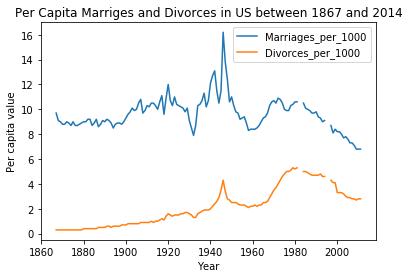

In [95]:
mat.figure()
records.plot('Year',y=['Marriages_per_1000','Divorces_per_1000'])
mat.title('Per Capita Marriges and Divorces in US between 1867 and 2014')
mat.ylabel('Per capita value')
mat.xlabel('Year')
mat.legend(['Marriages_per_1000','Divorces_per_1000'])
mat.show()

##q7: Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000. Don't forget to label your axes!

In [132]:
import pandas as pd
import matplotlib.pyplot as mat
from matplotlib.pyplot import figure

records = pd.read_csv('/users/Admin/Downloads/us-marriages-divorces-1867-2014.csv')
records.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


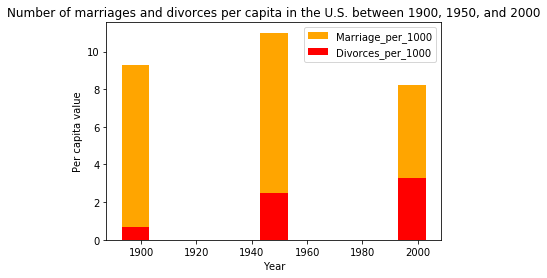

In [102]:
records = records[
records['Year'].apply(lambda x: x in [1900, 1950, 2000])]

years = records['Year']
MPC= records['Marriages_per_1000'].values
divorce = records['Divorces_per_1000'].values
width = 10

mat.bar(years-2, MPC, width,label='Marriage_per_1000',color='orange')
mat.bar(years-2, divorce, width,label='Divorces_per_1000',color='red')


mat.title('Number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000')
mat.legend()
mat.ylabel('Per capita value')
mat.xlabel('Year')
mat.show()

##q8: Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. Don't forget to label your axes!

In [103]:
import pandas as pd
import matplotlib.pyplot as mat
from matplotlib.pyplot import figure


hollywood = pd.read_csv('/users/Admin/Downloads/actor_kill_counts.csv')
hollywood=hollywood.sort_values("Count")
hollywood

,Actor,Count
9,Wesley Snipes,193
3,Clive Owen,194
5,Jet Li,201
6,Nicolas Cage,204
2,Clint Eastwood,207
8,Tomisaburo Wakayama,226
4,Dolph Lundgren,239
7,Sylvester Stallone,267
1,Chow Yun-Fat,295
0,Arnold Schwarzenegger,369


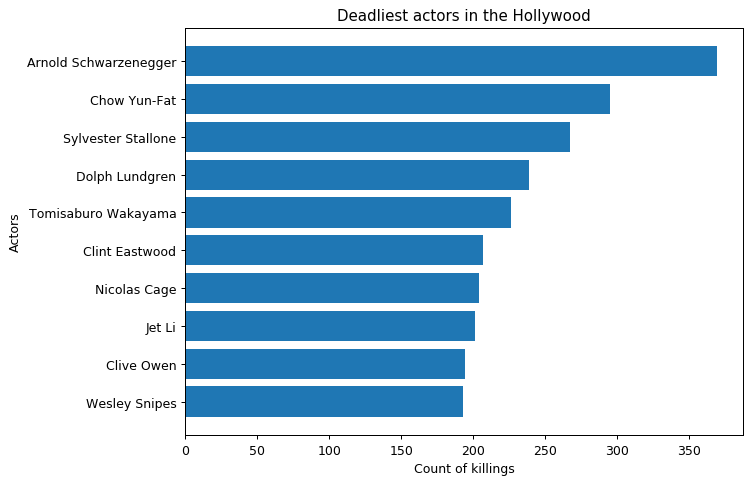

In [104]:
figure(figsize=(8, 6), dpi=90)
actor = hollywood['Actor']
count = hollywood['Count']
mat.barh(actor, count)
mat.xlabel("Count of killings")
mat.ylabel("Actors")
mat.title("Deadliest actors in the Hollywood")
mat.show()

##q9: Create a pie chart showing the fraction of all Roman Emperors that were assassinated. Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

In [106]:
import pandas as pd
import matplotlib.pyplot as mat
from matplotlib.pyplot import figure

r_emperor = pd.read_csv('/users/Admin/Downloads/roman-emperor-reigns.csv')
r_emperor.head()


,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide


In [107]:
r_emperor.set_index('Cause_of_Death', inplace = True)
 
assntd_emp = pd.DataFrame(r_emperor.loc['Assassinated'])

assntd_emp

,Emperor,Length_of_Reign
Cause_of_Death,,
Assassinated,Caligula,4.83
Assassinated,Galba,0.58
Assassinated,Vitellius,0.67
Assassinated,Domitian,15.00
Assassinated,Commodus,15.00
Assassinated,Pertinax,0.25
Assassinated,Caracalla,19.00
Assassinated,Geta,3.00
Assassinated,Elagabalus,3.75


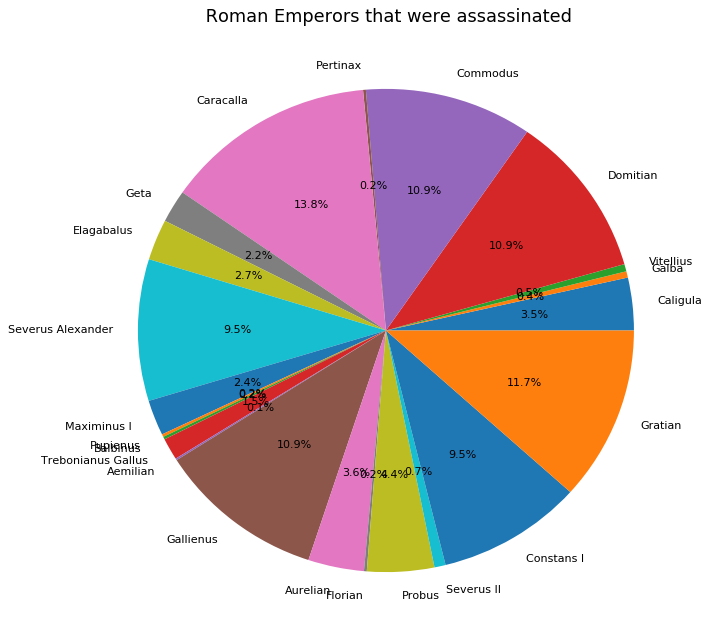

In [108]:
figure(figsize=(10, 10), dpi=80)
mat.pie(assntd_emp['Length_of_Reign'],autopct='%.1f%%', labels=assntd_emp['Emperor'])
plt.title(' Roman Emperors that were assassinated', fontdict ={'color' : 'black','fontsize': 16})
plt.show()

##q10: Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009. Don't forget to label your axes! Color each dot according to its year.

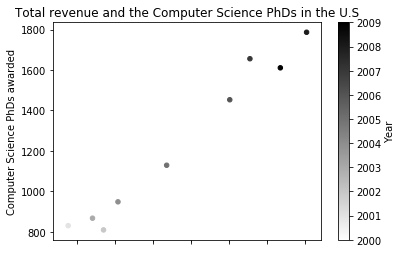

In [137]:
import pandas as pd

records = pd.read_csv('/users/Admin/Downloads/arcade-revenue-vs-cs-doctorates.csv')
records.plot.scatter(x='Total Arcade Revenue (billions)', y='Computer Science Doctorates Awarded (US)', c='Year',colormap='gist_gray_r');
mat.title('Total revenue and the Computer Science PhDs in the U.S')
mat.ylabel('Computer Science PhDs awarded')
mat.xlabel('Total revenue')
mat.show()